In [16]:
!pip install tflearn
!pip install PyDrive

    100% |████████████████████████████████| 993kB 1.3MB/s 
  Running setup.py bdist_wheel for PyDrive ... - done
  Stored in directory: /content/.cache/pip/wheels/ea/bd/b1/14e948c56cce2c7ac1589346cb54d7efb659fa2ddfa6abba88
Successfully built PyDrive


In [4]:
!ls -l

total 794456
-rw-r--r-- 1 root root       901 Feb  7 20:50 checkpoint
drwxr-xr-x 1 root root      4096 Feb  7 17:50 datalab
-rw-r--r-- 1 root root   6856408 Feb  7 20:50 resnet56_skeletal_insights.data-00000-of-00001
-rw-r--r-- 1 root root     22548 Feb  7 20:50 resnet56_skeletal_insights.index
-rw-r--r-- 1 root root   6301331 Feb  7 20:50 resnet56_skeletal_insights.meta
-rw-r--r-- 1 root root  27250357 Feb  7 21:20 test.pkl
-rw-r--r-- 1 root root         0 Feb  7 21:26 test.txt
-rw-r--r-- 1 root root 636175857 Feb  7 21:20 train.pkl
-rw-r--r-- 1 root root 136894533 Feb  7 21:20 validation.pkl


In [0]:

from __future__ import division, print_function, absolute_import

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm



In [0]:
import tflearn
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation

In [0]:
import os
import pickle
from os.path import basename
from PIL import Image

In [0]:


image_array = np.array([])
label_array = np.array([])
label_pairs ={
    'adho_mukha_svanasana':'1',
    'bharadvajasana':'2',
    'pasasana':'3',
    'salamba_sarvangasana':'4',
    'salamba_sirsasana':'5',
    'virabhadrasana_I':'6',
    'virabhadrasana_II':'7',
    'virabhadrasana_III':'8'
}

#In [16]: 
#In [17]: img = Image.open('../_static/stinkbug.png')
#In [18]: img.thumbnail((64, 64), Image.ANTIALIAS) # resizes image in-place
#In [19]: imgplot = plt.imshow(img)
w = 64
h = 64


In [0]:
def norm_size(img):
    #get max size
    size_tuple = img.size
    m = max(size_tuple)
    #create new image of max size (square)
    im2 = Image.new('RGB',(m,m))
    im2.paste(img)
    return im2

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [47]:
import pyDrive
dataFile = drive.CreateFile({'id': uploaded.get(PIK)})

ModuleNotFoundError: ignored

In [45]:
file_list = drive.ListFile({'q': "'1158sEr3Q7c4MLw_kOumDQIieq05PDile' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: holdout_data.pkl, id: 1EPXi2S5mcd-4Y_HA9iR02ML8xNokJju7
title: test_data.pkl, id: 1Ak6TC7cJZGB_iYhVz8w4siLxfN5q5Svk


In [0]:
file_list = drive.ListFile({'q': "'root/S' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: Copy of Untitled0.ipynb, id: 1kHV309M12Lq5tZWr-2_a07tQfyEvuQiE
title: mod_v0.64_INCEPTION.py, id: 1BeTSNECd4LboDx9jUpgfwiPldRRPQ1Ie
title: Colab Notebooks, id: 1mqXfK0RtVQ2FOrzXYgwcCZRTwatl59bJ
title: Jay Resume Startup.pdf, id: 10j2MjBF_97E67VyToKlCXLGjBLBdb1YN
title: fci_active_sp_report, id: 1UWUFwHKrObSkumDNzEb0aZLKiQu37EWwCsqTSkk9nio
title: Coming Soon.., id: 1-LCtW7iCkfUH4jyOJoRXqpQTOmlQbsDl
title: Untitled spreadsheet, id: 1zBnv2L357m4m_pCjfklcgkDkZYg9ctfGa8eELzwA9fg
title: Untitled document, id: 1iiMj-cJGehEmcjMuwNPxMquCzGgTseZ_-fmpV175VAU
title: Table Seating.xlsx, id: 1JJjxYR5q2jSiyq24lwiF00y06uuGJYGRP4kxzbLslzw
title: Table Seating, id: 1MHCpVHrB6FoJyT5ZUXUCrmIQYDk5cslwTBefFvk9TjI
title: Copy of Table Seating Arrangement, id: 1OlWgflMywkIc-9HEySYc10bgatxtIOQ-V-TXDwcZ-DM
title: Guest list.xlsx, id: 1ZG-7Wj3c0Qj3ijMHetIOzLOCTIPbRsAlfGzbKFVv11I
title: Guest list.xlsx, id: 0B4AG0JVNcFVONWZ0Qk5pMTZ4amVzMXZFR3pGRWZ3RkxxTFFr
title: Copy of Jie Hwa & Jie Yin Wedding List (29t

In [13]:

rootpath = '../data/raw/google_images_raw'
rootdir = os.listdir(rootpath)
datafile = open(rootpath+"/data.pkl","wb")
count=0
for subdir, dirs, files in os.walk(rootpath):
        if files:
                tag = os.path.relpath(subdir, rootpath)
                
        for file in files:
                tag_parent = os.path.dirname(tag)
                sub_folder = os.path.basename(tag)
                if (".jpg" in file or ".png" in file) :
                    img = Image.open(subdir+'/'+file)
                    img = norm_size(img)
                    if 'P' in img.mode: # check if image is a palette type
                            #img = img.convert("RGB") # convert it to RGB
                            img = img.resize((w,h),Image.ANTIALIAS) # resize it
                            #img = img.convert("P",dither=Image.NONE, palette=Image.ADAPTIVE) 
                                   #convert back to palette
                    else:
                            img = img.resize((w,h),Image.ANTIALIAS) # regular resize
                    img = np.array(img.convert('RGB'),dtype='float64')
                    label_array = np.append(label_array,sub_folder)
                    pickle.dump([img,sub_folder],datafile,protocol=2)
                    count = count + 1
datafile.close()


FileNotFoundError: ignored

In [0]:
print(count)

13107


In [0]:
X =[]
Y =[]
X_type = 'float64'
PIK = rootpath+"/data.pkl"
with open(PIK, "rb") as f:
    while True :
        try:
            record=pickle.load(f)
            X.append(record[0].astype(X_type))
            Y.append(label_pairs[record[1]])
        except EOFError:
            print('processing done!')
            break
            
print ("Train Data Size :" , len(X))

processing done!
Train Data Size : 13107


In [0]:
testdatapath = "./test_data"
testdatafile = open(testdatapath+"/test_data.pkl","wb")

for subdir, dirs, files in os.walk(testdatapath):
        if files:
                tag = os.path.relpath(subdir, testdatapath)
                
        for file in files:
                tag_parent = os.path.dirname(tag)
                sub_folder = os.path.basename(tag)
                if ".jpg" in file :
                    img = Image.open(subdir+'/'+file)
                    if 'P' in img.mode: # check if image is a palette type
                            #img = img.convert("RGB") # convert it to RGB
                            img = img.resize((w,h),Image.ANTIALIAS) # resize it
                            #img = img.convert("P",dither=Image.NONE, palette=Image.ADAPTIVE) 
                                   #convert back to palette
                    else:
                            img = img.resize((w,h),Image.ANTIALIAS) # regular resize
                    img = np.array(img.convert('RGB'),dtype='float64')
                    label_array = np.append(label_array,sub_folder)
                    pickle.dump([img,sub_folder],testdatafile,protocol=2)
testdatafile.close()

In [0]:
holdoutdatapath = "./holdout_data"
holdoutdatafile = open(holdoutdatapath+"/holdout_data.pkl","wb")
for subdir, dirs, files in os.walk(holdoutdatapath):
        if files:
                tag = os.path.relpath(subdir, holdoutdatapath)
                
        for file in files:
                tag_parent = os.path.dirname(tag)
                sub_folder = os.path.basename(tag)
                if ".jpg" in file :
                    img = Image.open(subdir+'/'+file)
                    if 'P' in img.mode: # check if image is a palette type
                            #img = img.convert("RGB") # convert it to RGB
                            img = img.resize((w,h),Image.ANTIALIAS) # resize it
                            #img = img.convert("P",dither=Image.NONE, palette=Image.ADAPTIVE) 
                                   #convert back to palette
                    else:
                            img = img.resize((w,h),Image.ANTIALIAS) # regular resize
                    img = np.array(img.convert('RGB'),dtype='float64')
                    label_array = np.append(label_array,sub_folder)
                    pickle.dump([img,sub_folder],holdoutdatafile,protocol=2)
holdoutdatafile.close()

In [0]:
print(img)


[[[  94.   38.   25.]
  [ 144.   59.   53.]
  [ 136.   93.   72.]
  ..., 
  [ 178.  185.  171.]
  [ 172.  174.  151.]
  [ 171.  176.  139.]]

 [[ 203.  211.  207.]
  [ 219.  224.  224.]
  [ 233.  247.  248.]
  ..., 
  [ 201.  208.  199.]
  [ 193.  201.  180.]
  [ 198.  207.  178.]]

 [[ 224.  144.  188.]
  [ 236.  214.  237.]
  [ 240.  255.  255.]
  ..., 
  [ 235.  244.  231.]
  [ 227.  238.  217.]
  [ 223.  234.  209.]]

 ..., 
 [[   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]
  ..., 
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 [[   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]
  ..., 
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]

 [[   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]
  ..., 
  [   0.    0.    0.]
  [   0.    0.    0.]
  [   0.    0.    0.]]]


In [0]:
pickle_file=open(rootpath+"/data.pkl", "rb" )
image_stored_1=pickle.load(pickle_file)
image_stored_2=pickle.load(pickle_file)

In [0]:
print(pickle.load(pickle_file))

[array([[[  16.,   12.,   12.],
        [  44.,   34.,   28.],
        [  44.,   33.,   27.],
        ..., 
        [  33.,   23.,   16.],
        [  36.,   29.,   21.],
        [  22.,   15.,   14.]],

       [[  17.,   13.,   12.],
        [  45.,   35.,   29.],
        [  44.,   34.,   27.],
        ..., 
        [  98.,   94.,   88.],
        [ 124.,  121.,  115.],
        [  67.,   65.,   60.]],

       [[  16.,   13.,   12.],
        [  46.,   36.,   29.],
        [  45.,   35.,   28.],
        ..., 
        [ 162.,  166.,  146.],
        [ 153.,  155.,  134.],
        [  72.,   73.,   63.]],

       ..., 
       [[   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        ..., 
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.]],

       [[   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        ..., 
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [

(64, 64, 3)


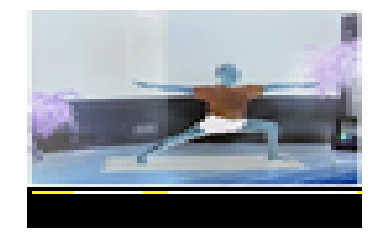

virabhadrasana_II


In [0]:
plt.axis("off")
plt.imshow(image_stored_1[0],aspect="auto")
print(image_stored_1[0].shape)

plt.show()
print(image_stored_1[1])

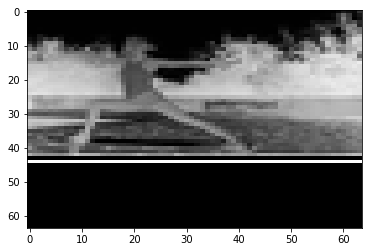

In [0]:
plt.imshow(image_stored_2[0],aspect="auto")
plt.show()

In [0]:
import cv2

[[ 1.          0.04166667 -0.83333333]
 [-0.02272727  0.97727273  1.45454545]]


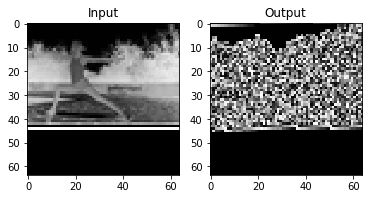

In [0]:
rows,cols,ch = image_stored_2[0].shape
pts1 = np.float32([[0,20],[20,cols-20],[rows-20,20]])
#pts2 = np.float32([[10,10],[10,cols-10],[rows-10,10]])
pts2 = np.float32([[0,21],[21,cols-20],[rows-20,20]])
#pts2 = np.matmul(pts2,[[0.94]]) 
#pts1 = np.float32([[0,0],[0,cols-1],[rows-1,0]])
#pts2 = np.float32([[10,10],[10,cols-10],[rows-10,10]])
#pts2 = np.float32([[cols*0.15,rows*.],[rows*.25,cols*.85],[(rows*.33),0]])

M = cv2.getAffineTransform(pts1,pts2)
print(M)
dst = cv2.warpAffine(image_stored_2[0],M, (cols,rows))

plt.subplot(121),plt.imshow(image_stored_2[0]), plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()